# Análisis de Datos del **Consumo de Energía Eléctrica de los clientes de Electro Ucayali SA**
La determinación del pliego tarifario a los usuarios se da en base a la comunicación que brinda el ente regulador OSINERGMIN a la empresa Electro Ucayali S.A.
Fuente: [Plataforma de Datos Abietos](https://www.datosabiertos.gob.pe/dataset/consumo-de-energ%C3%ADa-el%C3%A9ctrica-de-los-clientes-de-electro-ucayali-sa)

## 1. Cargamos Data de 04 meses (CSV diferenes)
La facturación de diferentes meses proporcionada por **Electro Ucayali**, nos permitira realizar un análisis exploratorio para lo cual procederemos a concatenar los DataSets de cada mes en un único DataSet para un mejor tratamiento.
*   DataSet Octubre 2022
*   DataSet Noviembre 2022
*   DataSet Diciembre 2022
*   DataSet Enero 2023



In [ ]:
import pandas as pd

url_Oct2022='https://drive.google.com/file/d/12I3VOnQgbZD78PQ9gTaYLXk7_SbW0K3p/view?usp=sharing'

file_id=url_Oct2022.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df_Oct2022 = pd.read_csv(dwn_url, encoding='utf-8', sep=',')
print('DataSet Octubre 2022 \t->Registros: %s \t->Atributos: %s' %(df_Oct2022.shape[0], df_Oct2022.shape[1]))


url_Nov2022='https://drive.google.com/file/d/1VvzbknaoRhfRNgKy3nL9K6u7nutXP5y3/view?usp=sharing'

file_id=url_Nov2022.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df_Nov2022 = pd.read_csv(dwn_url, encoding='utf-8', sep=',')
print('DataSet Noviembre 2022 \t->Registros: %s \t->Atributos: %s' %(df_Nov2022.shape[0], df_Nov2022.shape[1]))


url_Dic2022='https://drive.google.com/file/d/172YeNOYug44lyHruwkE7HGD2AMSiwoEZ/view?usp=sharing'

file_id=url_Dic2022.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df_Dic2022 = pd.read_csv(dwn_url, encoding='utf-8', sep=',')
print('DataSet Diciembre 2022 \t->Registros: %s \t->Atributos: %s' %(df_Dic2022.shape[0], df_Dic2022.shape[1]))


url_Ene2023='https://drive.google.com/file/d/16OdvcKnJmMMjeSGKy4D6GztTiOGBjJVu/view?usp=sharing'

file_id=url_Ene2023.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df_Ene2023 = pd.read_csv(dwn_url, encoding='utf-8', sep=',')
print('DataSet Enero 2023 \t->Registros: %s \t->Atributos: %s' %(df_Ene2023.shape[0], df_Ene2023.shape[1]))


DataSet Octubre 2022 	->Registros: 96218 	->Atributos: 12
DataSet Noviembre 2022 	->Registros: 96254 	->Atributos: 12
DataSet Diciembre 2022 	->Registros: 96423 	->Atributos: 12
DataSet Enero 2023 	->Registros: 96526 	->Atributos: 12


In [ ]:
df = pd.concat([df_Oct2022, df_Nov2022, df_Dic2022, df_Ene2023], ignore_index=True)
df.shape

(385421, 12)

In [ ]:
df.head()

,TITULAR,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_ALTA,TARIFA,PERIODO,CONSUMO_KWATTS,FACTURACION,STATUS_CLIENTE,FECHA_CORTE
0,10001,UCAYALI,PADRE ABAD,PADRE ABAD,250301,20020301,BT5B,202211,54.0,40.4,NORMAL,20221109
1,10002,UCAYALI,PADRE ABAD,PADRE ABAD,250301,20030606,BT5B,202211,1.0,34.7,NORMAL,20221109
2,10003,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,20140705,BT5B,202211,53.0,100.1,NORMAL,20221109
3,10004,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,20160711,BT5B,202211,100.0,83.8,NORMAL,20221109
4,10005,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,20010814,BT5B,202211,99.0,83.4,NORMAL,20221109


## 2. Limpieza de Datos
Notamos que se tienen datos de instalación del servicio, de los **inicios del 1900**, fecha en la cual evidentemente no se contaba con este tipo de servicios, por lo que no es posible que esta data sea real.

In [ ]:
# Obtenemos los indices de los registros cuyas fechas de alta son anteriores a 1990
df.sort_values(by=['FECHA_ALTA'], ascending=True, inplace=True, axis=0)
print(list(df[(df.FECHA_ALTA<19900101)].index))
df.head()

[131716, 19042, 109884, 41410, 179995, 126198, 72217, 140210, 69696, 83542, 19000, 174388]


,TITULAR,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_ALTA,TARIFA,PERIODO,CONSUMO_KWATTS,FACTURACION,STATUS_CLIENTE,FECHA_CORTE
131716,45499,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19000101,BT5B,202212,345.0,324.8,NORMAL,20221209
19042,29043,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19000101,BT5B,202211,61.0,117.0,NORMAL,20221109
109884,23667,UCAYALI,ATALAYA,RAYMONDI,250201,19000101,BT5B,202212,0.0,40.3,NORMAL,20221209
41410,51411,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,19000101,BT5B,202211,658.0,340.4,NORMAL,20221109
179995,93778,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19000101,BT5B,202212,58.0,102.5,NORMAL,20221209


In [ ]:
# Eliminamos los registros fuera de fecha identificados
df.drop(list(df[(df.FECHA_ALTA<19900101)].index), inplace=True)
df.head()

,TITULAR,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_ALTA,TARIFA,PERIODO,CONSUMO_KWATTS,FACTURACION,STATUS_CLIENTE,FECHA_CORTE
180703,94486,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202212,133.0,115.3,NORMAL,20221209
175487,89270,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202212,144.0,138.7,NORMAL,20221209
23242,33243,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202211,144.0,134.0,NORMAL,20221109
215879,33408,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202301,166.0,159.9,NORMAL,2023109
310839,31945,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202302,144.0,135.2,NORMAL,2023209


## 3. Análisis Exploratorio Preliminar
Se realiza un análisis evaluando los siguientes aspectos:
1.   Cantidad de abonados por Tipo de Tarifa
2.   Realizando un análisis de las dos tarifas mas usadas
3.   Realizando una análisis de la tarifa mas usada **BT5B**



### 3.1. Abonados por **Tipo de Tarifa**
Claramente se evidencia lo siguiente:
*   La tarifa **BT8** tiene por lo menos 13.8 veces un costo mas elevado que las demas 
*   La provincia de **PURUS** presenta el 100% de abonados con la tarifa **BT8** y un considerable número menor de abonados con respecto al resto de provincias.



In [ ]:
tarifa = df.groupby('TARIFA').sum()

In [ ]:
tarifa.reset_index(inplace=True)
tarifa.head()

,TARIFA,TITULAR,UBIGEO,FECHA_ALTA,PERIODO,CONSUMO_KWATTS,FACTURACION,FECHA_CORTE
0,BT5B,22214299858,95575728869,7688931686306,77364751875,46841618.00,65695257.8,4249765302072
1,BT5D,8501800,35268965,2841361020,28517668,786537.00,957085.9,1668313069
2,BT8,199590873,691106760,55725506760,558227940,25850.96,501261.7,30697158840


In [ ]:
tarifa.columns

Index(['TARIFA', 'TITULAR', 'UBIGEO', 'FECHA_ALTA', 'PERIODO',
       'CONSUMO_KWATTS', 'FACTURACION', 'FECHA_CORTE'],
      dtype='object')

In [ ]:
tarifa.drop(['TITULAR', 'UBIGEO', 'FECHA_ALTA', 'PERIODO', 'FECHA_CORTE'], axis=1, inplace=True)
tarifa['COSTO_KWATTS'] = tarifa['FACTURACION'] / tarifa['CONSUMO_KWATTS']
tarifa

,TARIFA,CONSUMO_KWATTS,FACTURACION,COSTO_KWATTS
0,BT5B,46841618.00,65695257.8,1.402498
1,BT5D,786537.00,957085.9,1.216835
2,BT8,25850.96,501261.7,19.390448


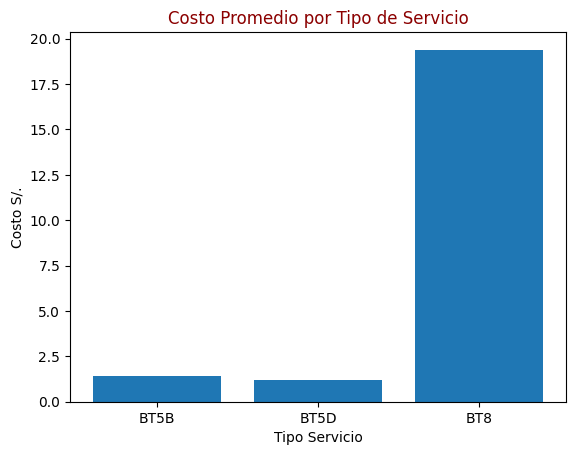

In [ ]:
# Calling libraries 
import matplotlib.pyplot as plt  # alias

x = list(tarifa['TARIFA'])
y = list(tarifa['COSTO_KWATTS'])

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
        
# Adding a title and axis text
plt.title("Costo Promedio por Tipo de Servicio", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Tipo Servicio")
plt.ylabel("Costo S/.")

# plot using x, y (coordinates)
plt.bar(x,y)
plt.show()

In [ ]:
pd.crosstab(df.TARIFA, df.PROVINCIA)

PROVINCIA,ATALAYA,CORONEL PORTILLO,PADRE ABAD,PUERTO INCA,PURUS
TARIFA,,,,,
BT5B,10765,309804,59836,698,1405
BT5D,22,108,11,0,0
BT8,0,0,0,0,2760


In [ ]:
df_consumo_bt5B = df[(df.TARIFA=='BT5B')]
df_consumo_bt5d = df[(df.TARIFA=='BT5D')]
df_consumo_bt8 = df[(df.TARIFA=='BT8')]

print('DataSet Tarifa BT5B \t->Registros: %s \t->Atributos: %s' %(df_consumo_bt5B.shape[0], df_consumo_bt5B.shape[1]))
print('DataSet Tarifa BT5D \t->Registros: %s \t->Atributos: %s' %(df_consumo_bt5d.shape[0], df_consumo_bt5d.shape[1]))
print('DataSet Tarifa BT8 \t->Registros: %s \t->Atributos: %s' %(df_consumo_bt8.shape[0], df_consumo_bt8.shape[1]))

DataSet Tarifa BT5B 	->Registros: 382508 	->Atributos: 12
DataSet Tarifa BT5D 	->Registros: 141 	->Atributos: 12
DataSet Tarifa BT8 	->Registros: 2760 	->Atributos: 12


### 3.2. Top 02 Tarifas mas Usadas

In [ ]:
# Analizando las 1ra tarifa mas usada
df_consumo_bt5B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382508 entries, 180703 to 349744
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TITULAR         382508 non-null  int64  
 1   DEPARTAMENTO    382508 non-null  object 
 2   PROVINCIA       382508 non-null  object 
 3   DISTRITO        382508 non-null  object 
 4   UBIGEO          382508 non-null  int64  
 5   FECHA_ALTA      382508 non-null  int64  
 6   TARIFA          382508 non-null  object 
 7   PERIODO         382508 non-null  int64  
 8   CONSUMO_KWATTS  382508 non-null  float64
 9   FACTURACION     382508 non-null  float64
 10  STATUS_CLIENTE  382508 non-null  object 
 11  FECHA_CORTE     382508 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 37.9+ MB


In [ ]:
tarifa_BT5B = df_consumo_bt5B.groupby('PERIODO').agg({'CONSUMO_KWATTS':['max','sum'], 'FACTURACION':['max','sum'], 'PERIODO':'count'})
tarifa_BT5B

CONSUMO_KWATTS             FACTURACION             PERIODO
                   max         sum         max         sum   count
PERIODO                                                           
202211          8923.0  12060056.0     46738.3  16463125.5   95484
202212          8434.0  11350062.0     47089.2  16544941.6   95520
202301          8823.0  11997780.0     47422.7  16589286.5   95697
202302          8527.0  11433720.0     19669.5  16097904.2   95807

In [ ]:
tarifa_BT5B.columns = ['KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX', 'FACTURACION_SUM',	'CANTIDAD']
tarifa_BT5B.reset_index(inplace=True)
print(tarifa_BT5B.columns)
tarifa_BT5B

Index(['PERIODO', 'KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX',
       'FACTURACION_SUM', 'CANTIDAD'],
      dtype='object')


,PERIODO,KWATTS_MAX,KWATTS_SUM,FACTURACION_MAX,FACTURACION_SUM,CANTIDAD
0,202211,8923.0,12060056.0,46738.3,16463125.5,95484
1,202212,8434.0,11350062.0,47089.2,16544941.6,95520
2,202301,8823.0,11997780.0,47422.7,16589286.5,95697
3,202302,8527.0,11433720.0,19669.5,16097904.2,95807


In [ ]:
# Analizando la 2da tarifa mas usada
df_consumo_bt8.head()

,TITULAR,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_ALTA,TARIFA,PERIODO,CONSUMO_KWATTS,FACTURACION,STATUS_CLIENTE,FECHA_CORTE
57097,67098,UCAYALI,PURUS,PURUS,250401,20190401,BT8,202211,8.63,21.6,NORMAL,20221109
159948,73731,UCAYALI,PURUS,PURUS,250401,20190401,BT8,202212,8.63,271.8,NORMAL,20221209
176830,90613,UCAYALI,PURUS,PURUS,250401,20190401,BT8,202212,8.63,12.0,NORMAL,20221209
121761,35544,UCAYALI,PURUS,PURUS,250401,20190401,BT8,202212,8.63,12.0,NORMAL,20221209
366431,87537,UCAYALI,PURUS,PURUS,250401,20190401,BT8,202302,8.63,11.8,NORMAL,2023209


In [ ]:
df_consumo_bt8_tiempo = df_consumo_bt8.groupby('FECHA_ALTA').agg({'CONSUMO_KWATTS':['max','sum'], 'FACTURACION':['max','sum'], 'FECHA_ALTA':'count'})

df_consumo_bt8_tiempo.columns = ['KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX', 'FACTURACION_SUM',	'CANTIDAD']
df_consumo_bt8_tiempo.reset_index(inplace=True)
print(df_consumo_bt8_tiempo.columns)
df_consumo_bt8_tiempo

Index(['FECHA_ALTA', 'KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX',
       'FACTURACION_SUM', 'CANTIDAD'],
      dtype='object')


,FECHA_ALTA,KWATTS_MAX,KWATTS_SUM,FACTURACION_MAX,FACTURACION_SUM,CANTIDAD
0,20190401,28.17,25850.96,510.3,501261.7,2760


In [ ]:
df_consumo_bt8_tiempo.shape

(1, 6)

In [ ]:
df_consumo_bt8_tiempo[['FECHA_ALTA', 'CANTIDAD']]

,FECHA_ALTA,CANTIDAD
0,20190401,2760


### 3.3. Analizando **BT5B** Top Tarifa mas usada
Considerando la cantidad tan corta de meses de facturación (04 meses), notamos que el espacio de tiempo no es suficiente para una análisis de patrones, por lo que se trabajará con las **FECHAS DE ALTA DEL SERVICIO** puesta que se cuenta desde el año 1990 a la fecha. 

In [ ]:
df_consumo_bt5B

# Obtenemos el AÑO de las fecha de alta de abonados del servicio
df_consumo_bt5B['FECHA_ALTA'] = df_consumo_bt5B['FECHA_ALTA'].astype(str)
df_consumo_bt5B['FECHA_MY'] = df_consumo_bt5B['FECHA_ALTA'].apply(lambda x:x[0:4])


# Agrupamos obteniendo el CONSUMO EN KWATTS, FACTURACIÓN y CANTIDAD DE ABONADOS por año
df_consumo_bt5B_tiempo = df_consumo_bt5B.groupby('FECHA_MY').agg({'CONSUMO_KWATTS':['max','sum'], 'FACTURACION':['max','sum'], 'FECHA_MY':'count'})

df_consumo_bt5B_tiempo.columns = ['KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX', 'FACTURACION_SUM',	'CANTIDAD']
df_consumo_bt5B_tiempo.reset_index(inplace=True)
print(df_consumo_bt5B_tiempo.columns)
df_consumo_bt5B_tiempo.head()

Index(['FECHA_MY', 'KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX',
       'FACTURACION_SUM', 'CANTIDAD'],
      dtype='object')


<ipython-input-150-ca748e478823>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-150-ca748e478823>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FECHA_MY,KWATTS_MAX,KWATTS_SUM,FACTURACION_MAX,FACTURACION_SUM,CANTIDAD
0,1990,2021.0,90732.0,3601.2,117556.2,496
1,1991,1752.0,192149.0,3173.0,255924.7,1013
2,1992,5002.0,254211.0,8242.0,327991.9,1158
3,1993,1352.0,162083.0,2466.6,197019.0,860
4,1994,4879.0,340843.0,8453.3,455485.9,1963


#### Evolución de Abonados (1990 - 2022)
Notamos que en los años 1998 y 2021 se tubo un pico similar de cantidad alta de abonados, muy sobresaliente respecto a los demás años. 

In [ ]:
df_bt5B_tiempo_alta = df_consumo_bt5B_tiempo[['FECHA_MY', 'CANTIDAD']]

import plotly.express as px

fig = px.line(df_bt5B_tiempo_alta, x='FECHA_MY', y=df_bt5B_tiempo_alta.columns, 
              hover_data={'FECHA_MY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='Servicios en Alta 1990 - 2022')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()

#### Alta de Abonados por Provincia en el Tiempo
Del total de provincias de Ucayali, sobresalen **CORONEL PORTILLO** y **PADRE ABAD**.
1.   **CORONEL PORTILLO:** Tiene en el tiempo una aplica cantidad de abonados respecto a las demas provincias
2.   **PADRE ABAD:** A partir del año 2011 inicia su incremento en la cantidad abonados anuales, sobrepasando incluso a CORONEL PORTILLO en el año 2022.

Esto nos lleva a pensar que existe una notable desarrollo o por lo menos una creciente demanda de consumo de energia electrica en la PROVINCIA DE PADRE ABAD.



In [ ]:
df_consumo_bt5B_prov = pd.crosstab(df_consumo_bt5B.FECHA_MY, df_consumo_bt5B.PROVINCIA)
df_consumo_bt5B_prov.reset_index(inplace=True)
df_consumo_bt5B_prov.tail()

PROVINCIA,FECHA_MY,ATALAYA,CORONEL PORTILLO,PADRE ABAD,PUERTO INCA,PURUS
29,2019,1229,7632,2164,136,1252
30,2020,341,8875,1204,53,76
31,2021,417,18669,8018,164,24
32,2022,425,7458,9619,90,53
33,2023,13,90,54,2,0


In [ ]:
import plotly.express as px

fig = px.line(df_consumo_bt5B_prov, x='FECHA_MY', y=df_consumo_bt5B_prov.columns, 
              hover_data={'FECHA_MY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='Servicios en Alta por Provincia (1990 - 2022)')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()

#### Consumo **KWatts** por Provincia
Similar al caso anterior y de manera lógica se nota que sobresalen **CORONEL PORTILLO** y **PADRE ABAD** en el consumo energético, lo que es una consecuencia directa del incremento de la cantidad de abonados anual.
Sin embargo el consumo energético es significativamente superior en la PROVINCIA DE CORONEL PORTILLO respecto al total de las demas provincias.

In [ ]:
df_consumo_bt5B_tiempo = df_consumo_bt5B.groupby('FECHA_MY').agg({'CONSUMO_KWATTS':['max','sum'], 'FACTURACION':['max','sum'], 'FECHA_MY':'count'})

df_consumo_bt5B_tiempo.columns = ['KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX', 'FACTURACION_SUM',	'CANTIDAD']
df_consumo_bt5B_tiempo.reset_index(inplace=True)
print(df_consumo_bt5B_tiempo.columns)
df_consumo_bt5B_tiempo.head()

Index(['FECHA_MY', 'KWATTS_MAX', 'KWATTS_SUM', 'FACTURACION_MAX',
       'FACTURACION_SUM', 'CANTIDAD'],
      dtype='object')


,FECHA_MY,KWATTS_MAX,KWATTS_SUM,FACTURACION_MAX,FACTURACION_SUM,CANTIDAD
0,1990,2021.0,90732.0,3601.2,117556.2,496
1,1991,1752.0,192149.0,3173.0,255924.7,1013
2,1992,5002.0,254211.0,8242.0,327991.9,1158
3,1993,1352.0,162083.0,2466.6,197019.0,860
4,1994,4879.0,340843.0,8453.3,455485.9,1963


In [ ]:
df_consumo_bt5B.head()

,TITULAR,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_ALTA,TARIFA,PERIODO,CONSUMO_KWATTS,FACTURACION,STATUS_CLIENTE,FECHA_CORTE,FECHA_MY
180703,94486,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202212,133.0,115.3,NORMAL,20221209,1990
175487,89270,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202212,144.0,138.7,NORMAL,20221209,1990
23242,33243,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202211,144.0,134.0,NORMAL,20221109,1990
215879,33408,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202301,166.0,159.9,NORMAL,2023109,1990
310839,31945,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,19900110,BT5B,202302,144.0,135.2,NORMAL,2023209,1990


In [ ]:
df_consumo_bt5B_tiempo_prov = df_consumo_bt5B.groupby(['FECHA_MY', 'PROVINCIA']).agg({'CONSUMO_KWATTS':'sum', 'FACTURACION':'sum', 'FECHA_MY':'count'})

df_consumo_bt5B_tiempo_prov.columns = ['KWATTS_SUM', 'FACTURACION_SUM',	'CANTIDAD']
df_consumo_bt5B_tiempo_prov.reset_index(inplace=True)
print(df_consumo_bt5B_tiempo_prov.columns)
df_consumo_bt5B_tiempo_prov.head()

Index(['FECHA_MY', 'PROVINCIA', 'KWATTS_SUM', 'FACTURACION_SUM', 'CANTIDAD'], dtype='object')


,FECHA_MY,PROVINCIA,KWATTS_SUM,FACTURACION_SUM,CANTIDAD
0,1990,CORONEL PORTILLO,90732.0,117556.2,496
1,1991,CORONEL PORTILLO,192149.0,255924.7,1013
2,1992,CORONEL PORTILLO,254211.0,327991.9,1158
3,1993,CORONEL PORTILLO,162083.0,197019.0,860
4,1994,CORONEL PORTILLO,340843.0,455485.9,1963


In [ ]:
# 1. Data de 'ATALAYA'
df_consumo_bt5B_tiempo_prov_atl = df_consumo_bt5B_tiempo_prov[(df_consumo_bt5B_tiempo_prov.PROVINCIA=='ATALAYA')][['FECHA_MY', 'KWATTS_SUM']]
df_consumo_bt5B_tiempo_prov_atl.columns = ['FECHA_MY', 'ATALAYA']

# 2. Data de 'CORONEL PORTILLO'
df_consumo_bt5B_tiempo_prov_crn = df_consumo_bt5B_tiempo_prov[(df_consumo_bt5B_tiempo_prov.PROVINCIA=='CORONEL PORTILLO')][['FECHA_MY', 'KWATTS_SUM']]
df_consumo_bt5B_tiempo_prov_crn.columns = ['FECHA_MY', 'CORONEL PORTILLO']

# 3. Data de 'PADRE ABAD'
df_consumo_bt5B_tiempo_prov_pdr = df_consumo_bt5B_tiempo_prov[(df_consumo_bt5B_tiempo_prov.PROVINCIA=='PADRE ABAD')][['FECHA_MY', 'KWATTS_SUM']]
df_consumo_bt5B_tiempo_prov_pdr.columns = ['FECHA_MY', 'PADRE ABAD']

# 4. Data de 'PUERTO INCA'
df_consumo_bt5B_tiempo_prov_prt = df_consumo_bt5B_tiempo_prov[(df_consumo_bt5B_tiempo_prov.PROVINCIA=='PUERTO INCA')][['FECHA_MY', 'KWATTS_SUM']]
df_consumo_bt5B_tiempo_prov_prt.columns = ['FECHA_MY', 'PUERTO INCA']

# 5. Data de 'PURUS'
df_consumo_bt5B_tiempo_prov_prs = df_consumo_bt5B_tiempo_prov[(df_consumo_bt5B_tiempo_prov.PROVINCIA=='PURUS')][['FECHA_MY', 'KWATTS_SUM']]
df_consumo_bt5B_tiempo_prov_prs.columns = ['FECHA_MY', 'PURUS']

In [ ]:
from functools import reduce

dfs = [df_consumo_bt5B_tiempo_prov_atl, df_consumo_bt5B_tiempo_prov_crn, df_consumo_bt5B_tiempo_prov_pdr, df_consumo_bt5B_tiempo_prov_prt, df_consumo_bt5B_tiempo_prov_prs]
final_df = reduce(lambda left, right: pd.merge(left, right, on=['FECHA_MY'], how='outer'), dfs).fillna(0)

final_df.sort_values(by=['FECHA_MY'], ascending=True, inplace=True, axis=0)

final_df.head()

,FECHA_MY,ATALAYA,CORONEL PORTILLO,PADRE ABAD,PUERTO INCA,PURUS
24,1990,0.0,90732.0,0.0,0.0,0.0
25,1991,0.0,192149.0,0.0,0.0,0.0
26,1992,0.0,254211.0,0.0,0.0,0.0
27,1993,0.0,162083.0,0.0,0.0,0.0
28,1994,0.0,340843.0,0.0,0.0,0.0


In [ ]:
import plotly.express as px

fig = px.line(final_df, x='FECHA_MY', y=final_df.columns, 
              hover_data={'FECHA_MY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='Consumo KWatts por Provincia (1990 - 2022)')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()